In [1]:
# Dependencies and Setup
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st


# Study data files
mouse_metadata_path = Path("data/Mouse_metadata.csv")
study_results_path = Path("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combo_data = pd.merge(study_results, mouse_metadata, how='left')

# Display the data table for preview
combo_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = combo_data['Mouse ID'].nunique()
mice_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combo_data[combo_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicates['Mouse ID']

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df = combo_data[combo_data["Mouse ID"] == 'g989']
duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouseID = combo_data.loc[combo_data['Mouse ID'] != 'g989']
clean_mouseID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_mouseID['Mouse ID'].nunique()
number_of_mice

248

## Summary Statistics:

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the TUMOR VOLUME for each REGIMEN
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_mouseID.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = clean_mouseID.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = clean_mouseID.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
standard_deviation = clean_mouseID.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
SEM = clean_mouseID.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
 
# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame({'Mean Tumor Volume' : mean,
                        'Median Tumor Volume' : median,
                        'Variance of Tumor Volume' : variance,
                        'Standard Deviation of Tumor Volume' : standard_deviation,
                        'SEM of Tumor Volume' : SEM})

summary

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# **AGGREGATION METHOD TAKES SOME KNOWN FUNCTIONS AS ARGUMENTS (eg. 'mean', 'median', etc.)
aggregate_summary = clean_mouseID.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' :['mean', 'median', 'var', 'std', 'sem']})
aggregate_summary



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar & Pie Charts

<Axes: xlabel='Drug Regimen'>

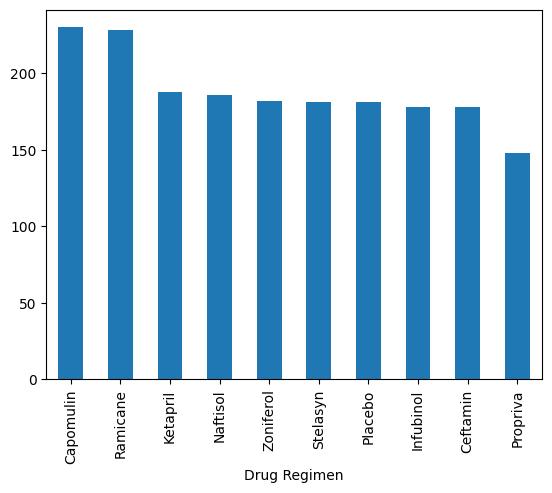

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

pandas_bar = clean_mouseID["Drug Regimen"].value_counts()

pandas_bar.plot(kind = 'bar')

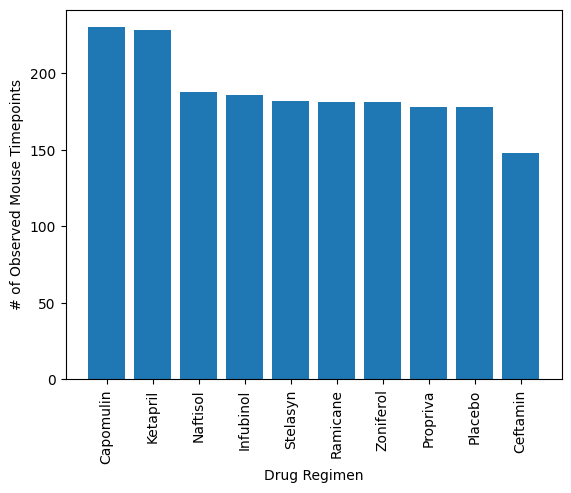

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = clean_mouseID["Drug Regimen"].value_counts()
categories = clean_mouseID["Drug Regimen"].unique()
plt.xticks(rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
pyplot_bar = plt.bar(categories, data)

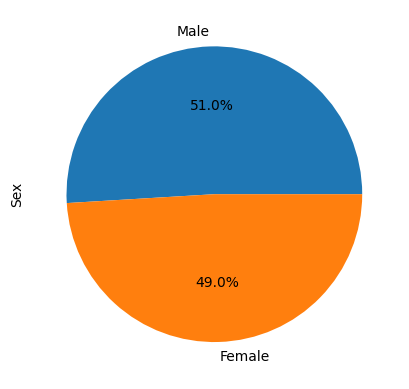

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_counts = clean_mouseID['Sex'].value_counts()
male_female_counts.plot(kind = "pie",  autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

Text(0, 0.5, 'Sex')

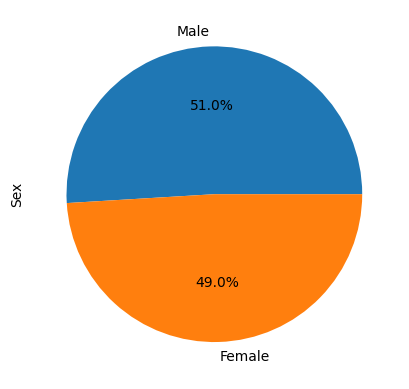

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = male_female_counts.index
plt.pie(male_female_counts, autopct="%1.1f%%", labels = male_female_counts.index)
plt.ylabel('Sex')

## Quartiles, Outliers & Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#the 'final' tumore volume is going to be the tumor volume at the last timepoint for each mouse
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse--as this is the 'final' recorded value for tumore volume
final_tumor_vol = clean_mouseID.groupby(["Mouse ID"])['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(final_tumor_vol, clean_mouseID, on = ['Mouse ID', 'Timepoint'])
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

#initialize a for loop that gathers data based on treatment type
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #below code loops thru data and indexes rows where the specific treatment is found, & adds the treatment and Tumor vol data to 'treatment_data'
    treatment_data = merged_data.loc[merged_data["Drug Regimen"] ==treatment, "Tumor Volume (mm3)"]
    #append that information to the list
    tumor_vol.append(treatment_data)
 # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5* iqr)
#define potential outliers as being either above the upper_bound OR below the lower_bound
# Determine outliers using upper and lower quartiles    
    potential_outliers = treatment_data.loc[
        (treatment_data < lower_bound) | 
        (treatment_data > upper_bound)]
    
    print(f"{treatment}'s potential outliers:",potential_outliers)


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


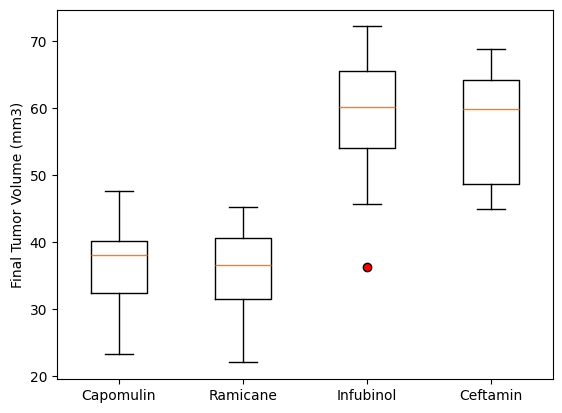

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#got the following code from ChatGPT on how to highlight outliers
    #flierprops=dict(markerfacecolor='red', marker='o')
plt.boxplot(tumor_vol, labels = treatments, flierprops=dict(markerfacecolor='red', marker='o'))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


In [57]:
clean_mouseID.loc[clean_mouseID["Drug Regimen"] == "Capomulin"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [ ]:
#obtain a dataframe of mice on capomulin to get a mouseID for next step
capomulin_mice = clean_mouseID.loc[clean_mouseID["Drug Regimen"] == "Capomulin"]

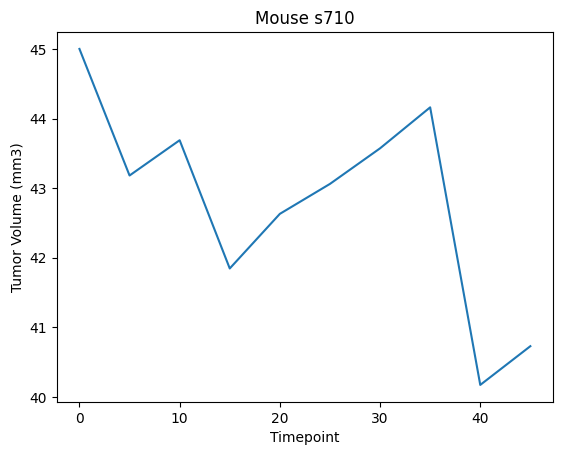

In [76]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

single_cap_mouse = capomulin_mice.loc[capomulin_mice["Mouse ID"] =="s710"]
plt.plot(single_cap_mouse["Timepoint"],single_cap_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s710")
plt.show()

In [77]:
capomulin_group = capomulin_mice.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
capomulin_group

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


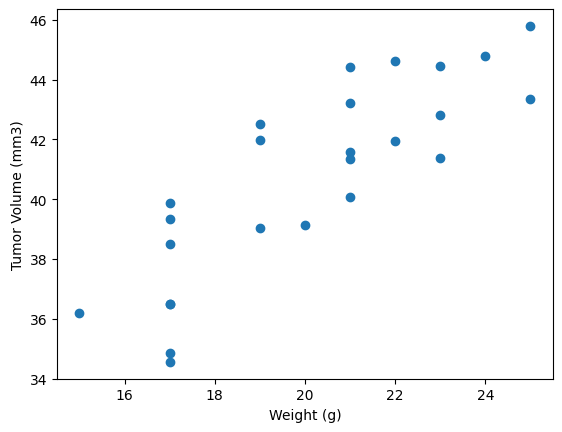

In [78]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin_group["Weight (g)"],capomulin_group["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [69]:
from scipy.stats import linregress

The correlation between Weight & Avg Tumor Volume is 0.84
R-squared: 0.7088568047708723


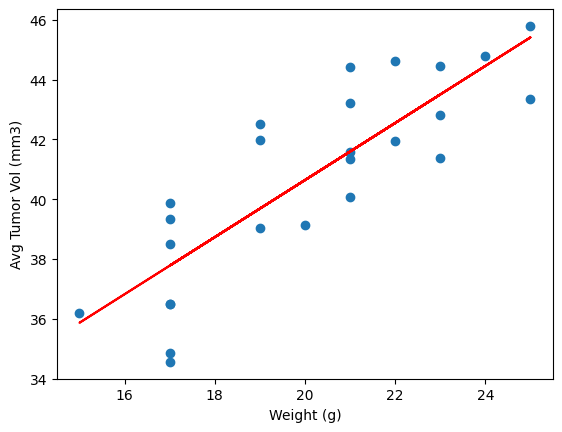

In [79]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_data = capomulin_group["Weight (g)"]
y_data = capomulin_group["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_data, y_data)
print(f"The correlation between Weight & Avg Tumor Volume is {round(correlation[0],2)}")
(slope, intercept, r_value, pvalue, stderr) = linregress(x_data, y_data)
regress_vals = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_data,y_data)
plt.plot(x_data,regress_vals,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Vol (mm3)')
print(f"R-squared: {r_value**2}")
